<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [115]:
import ipyparallel as ipp
from mpi4py import MPI

In [116]:
# use on command line:
# ipcluster start -n 6

In [117]:
cluster = ipp.Client(profile='mpi')
print('profile:', cluster.profile)
print("IDs:", cluster.ids) # Print process id numbers
%px import numpy as np

Waiting for connection file: ~/.ipython/profile_mpi/security/ipcontroller-client.json


OSError: Connection file '~/.ipython/profile_mpi/security/ipcontroller-client.json' not found.
You have attempted to connect to an IPython Cluster but no Controller could be found.
Please double-check your configuration and ensure that a cluster is running.

In [118]:
%%px

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# passing MPI datatypes explicitly
if rank == 0:
    data = np.arange(100, dtype='i')
    np.random.shuffle(data)
    comm.Send([data, MPI.INT], dest=1, tag=77)
    print("{} of {}: sent data to 1: {}".format(rank, size, data))
elif rank == 1:
    data = np.empty(100, dtype='i')
    comm.Recv([data, MPI.INT], source=0, tag=77)
    print("{} of {}: received data from 0: {}".format(rank, size, data))
else:
    print("{}: idle".format(rank))

UsageError: Cell magic `%%px` not found.


In [119]:
%%px
color = rank // 2 

UsageError: Cell magic `%%px` not found.


In [120]:
%%px
new_comm = comm.Split(color, rank)

UsageError: Cell magic `%%px` not found.


In [121]:
%%px
new_rank = new_comm.Get_rank()
new_size = new_comm.Get_size()
print("Color: {} / Local: {} of {} / Global: {} of {}".format(color, new_rank, new_size, rank, size))

UsageError: Cell magic `%%px` not found.


In [415]:
from cubedspherepartitioner import CubedSpherePartitioner

In [416]:
CubedSpherePartitioner

cubedspherepartitioner.CubedSpherePartitioner

In [417]:
import numpy as np
import math

In [418]:
cube_neighbors = {1: {'U': [3, 3], 'D': [6, 0], 'L': [5, 1], 'R': [2, 0]},
                  2: {'U': [3, 0], 'D': [6, 3], 'L': [1, 0], 'R': [4, 1]},
                  3: {'U': [5, 3], 'D': [2, 0], 'L': [1, 1], 'R': [4, 0]},
                  4: {'U': [5, 0], 'D': [2, 3], 'L': [3, 0], 'R': [6, 1]},
                  5: {'U': [1, 3], 'D': [4, 0], 'L': [3, 1], 'R': [6, 0]},
                  6: {'U': [1, 0], 'D': [4, 3], 'L': [5, 0], 'R': [2, 1]}}

In [419]:
size = 24
ranks_per_tile = size // 6
my_tile = size // ranks_per_tile
ranks_per_axis = int(math.sqrt(ranks_per_tile))


In [420]:
tiles_placement = {i: (i // ranks_per_tile) + 1 for i in range(size)}

In [421]:
tiles_placement.items()

dict_items([(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 2), (7, 2), (8, 3), (9, 3), (10, 3), (11, 3), (12, 4), (13, 4), (14, 4), (15, 4), (16, 5), (17, 5), (18, 5), (19, 5), (20, 6), (21, 6), (22, 6), (23, 6)])

In [422]:
ranks_placement = dict()
for k, v in tiles_placement.items():
    ranks_placement.setdefault(v, list()).append(k)

In [423]:
ranks_placement

{1: [0, 1, 2, 3],
 2: [4, 5, 6, 7],
 3: [8, 9, 10, 11],
 4: [12, 13, 14, 15],
 5: [16, 17, 18, 19],
 6: [20, 21, 22, 23]}

In [424]:
tile_roots = {v: k[0] for v, k in ranks_placement.items()}

In [425]:
tile_roots

{1: 0, 2: 4, 3: 8, 4: 12, 5: 16, 6: 20}

In [426]:
assert cube_neighbors[1]['L'][0] == cube_neighbors[6]['L'][0] == cube_neighbors[4]['U'][0], 'Cube geometry faulty'
assert cube_neighbors[6]['D'][0] == cube_neighbors[2]['R'][0] == cube_neighbors[3]['R'][0], 'Cube geometry faulty' 
assert cube_neighbors[3]['U'][0] == cube_neighbors[6]['L'][0] == cube_neighbors[1]['L'][0], 'Cube geometry faulty'

In [427]:
for i in range(6):
    rotation_sum = 0
    [rotation_sum := rotation_sum + k[1] for v, k in cube_neighbors[i+1].items()]
    assert rotation_sum == 4, 'Cube geometry faulty' 


In [428]:
rotations = [0, 0, 1, 3, 3, 0]
rank_grid = np.asarray([np.rot90(np.flipud(np.asarray(ranks_placement[i+1]).reshape(ranks_per_axis, -1)), rotations[i]) for i in range(6)])

In [429]:
m = np.array([[5, 0],
              [0, 5]])

In [430]:
np.rot90(m, 0)

array([[5, 0],
       [0, 5]])

In [431]:
np.rot90(m, -1)

array([[0, 5],
       [5, 0]])

In [432]:
np.rot90(m, 3)

array([[0, 5],
       [5, 0]])

In [433]:
x =  np.flipud(np.arange(4).reshape((2,-1)))

In [434]:
x

array([[2, 3],
       [0, 1]])

In [435]:
for i in range(4):
    print(np.rot90(x,i))

[[2 3]
 [0 1]]
[[3 1]
 [2 0]]
[[1 0]
 [3 2]]
[[0 2]
 [1 3]]


In [436]:
import matplotlib.pyplot as plt
%matplotlib inline

(-1.0, 2.0)

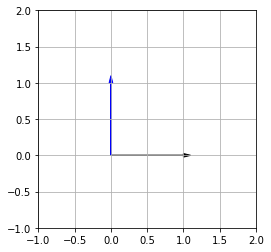

In [437]:

X = np.array((0))
Y = np.array((0))
E= np.array([[1, 0],
             [0, 1]])


fig, ax = plt.subplots()
q1 = ax.arrow(X, Y, E[0, 0], E[1, 0], head_width=0.05, head_length=0.1, fc='k', ec='k')
q2 = ax.arrow(X, Y, E[0, 1], E[1, 1], head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.grid()
ax.set_aspect('equal')

plt.xlim(-1,2)
plt.ylim(-1,2)

In [438]:
rot_R = np.array([[ 0, 1],
                  [-1, 0]])

In [439]:
rotate_90_deg = np.asarray([ [[ 1, 0],
                        [ 0, 1]],
                       [[ 0, 1],
                        [-1, 0]],
                       [[-1, 0],
                        [ 0,-1]],
                       [[ 0,-1],
                        [ 1, 0]] ])

In [440]:
rotate_90_deg[1]

array([[ 0,  1],
       [-1,  0]])

In [441]:
def setup_grid(__num_ranks):

    for ranks_x in range(math.floor( math.sqrt(__num_ranks) ), 0, -1):
        if __num_ranks % ranks_x == 0:
            break
    __size = (__num_ranks // ranks_x, ranks_x)
    return __size

In [442]:
setup_grid(num_ranks)

(6, 4)

In [443]:
rank_neighbors.items()

dict_items([('U', 2), ('D', 5), ('L', 4), ('R', 1)])

In [444]:
rank_neighbors['U']

2

In [445]:
[i for i in cube_neighbors[1]]

['U', 'D', 'L', 'R']

In [446]:
ttt = [cube_neighbors[1][d] for d in ['U', 'D', 'L', 'R']]

In [447]:
ttt

[[3, 3], [6, 0], [5, 1], [2, 0]]

In [448]:
def __calculate_rank_grid(tile, tile2ranks, ranks_per_axis, rotation):
    return np.rot90(np.flipud(np.asarray(tile2ranks[tile]).reshape(ranks_per_axis, -1)), rotation)

In [449]:
__calculate_rank_grid(2, ranks_placement, 2, 3)

array([[4, 6],
       [5, 7]])

In [450]:
cube_neighbors[1].keys()

dict_keys(['U', 'D', 'L', 'R'])

In [451]:
tttt

{6: 9999, 'U': [3, 3], 'D': [6, 0], 'L': [5, 1], 'R': [2, 0]}

In [452]:
num_halo = 2
global_rank = 0
num_ranks = 24
ranks_per_tile = 4

In [453]:
def __rank_global2local():
        """Return local tile rank based on global rank, ranks per tile"""
        return global_rank % ranks_per_tile

In [454]:
local_rank = __rank_global2local()

In [455]:
local_rank

0

In [456]:
size = __setup_grid(ranks_per_tile)

In [457]:
def __setup_grid():
        """Distribute ranks onto a Cartesian grid of workers"""
        for ranks_x in range(math.floor( math.sqrt(ranks_per_tile) ), 0, -1):
            if ranks_per_tile % ranks_x == 0:
                break
        return (ranks_per_tile // ranks_x, ranks_x)

In [458]:
def __rank_to_position(local_rank):
        """Find position of rank on worker grid"""
        # sanity check ---------
        # assert ( local_rank // size[1], local_rank % size[1] ) == np.where(rank_grid[tile] == global_rank), \
            # 'Check rank numbering consistency'
        # ----------------------
        return ( local_rank // size[1], local_rank % size[1] )

In [459]:
tile_neighbors = {1: {'U': [3, 1], 'D': [6, 0], 'L': [5, 3], 'R': [2, 0]},
                          2: {'U': [3, 0], 'D': [6, 1], 'L': [1, 0], 'R': [4, 3]},
                          3: {'U': [5, 1], 'D': [2, 0], 'L': [1, 3], 'R': [4, 0]},
                          4: {'U': [5, 0], 'D': [2, 1], 'L': [3, 0], 'R': [6, 3]},
                          5: {'U': [1, 1], 'D': [4, 0], 'L': [3, 3], 'R': [6, 0]},
                          6: {'U': [1, 0], 'D': [4, 1], 'L': [5, 0], 'R': [2, 3]}}

In [460]:
def __assign_ranks_tiles(num_ranks, ranks_per_tile):
        """Return dictionaries: rank->tile, tile->[ranks], tile->root rank"""
        
        rank2tile = {i: (i // ranks_per_tile) + 1 for i in range(num_ranks)} # 1-based tile numbering
        
        tile2ranks = dict()
        for k, v in rank2tile.items():
            tile2ranks.setdefault(v, list()).append(k)

        tile2root = {v: k[0] for v, k in tile2ranks.items()}

        return rank2tile, tile2ranks, tile2root

In [461]:
def __calculate_rank_grid(tile, tile2ranks, ranks_per_axis, rotation=0):
            """Return rotated array containing square grid of tile's global ranks"""
            return np.rot90(np.flipud(np.asarray(tile2ranks[tile]).reshape(ranks_per_axis, -1)), rotation)

In [462]:
def __assign_rank_grid(tile, tile2ranks, tile_neighbors, ranks_per_axis):
        """Return dictionary of arrays containing all neighboring tiles' placements of global ranks"""
        rank_grid = {tile: __calculate_rank_grid(tile, tile2ranks, ranks_per_axis)}
        for k, v in tile_neighbors[tile].items():
            rank_grid[k] = __calculate_rank_grid(v[0], tile2ranks, ranks_per_axis, v[1])
        return rank_grid

In [463]:
def __assign_rank_neighbors(global_rank, rank_grid, tile):
        """Return dictionary: global rank->global neighbor ranks"""
        up_down_grid = np.vstack((rank_grid['U'], rank_grid[tile], rank_grid['D']))
        left_right_grid = np.hstack((rank_grid['L'], rank_grid[tile], rank_grid['R'])) # tile numbering is 1-based

        y_up_down_grid, x_up_down_grid = np.where(up_down_grid == global_rank)
        y_left_right_grid, x_left_right_grid = np.where(left_right_grid == global_rank)
        
        return {'U': up_down_grid[(y_up_down_grid-1, x_up_down_grid)].item(),
                'D': up_down_grid[(y_up_down_grid+1, x_up_down_grid)].item(),
                'L': left_right_grid[(y_left_right_grid, x_left_right_grid-1)].item(),
                'R': left_right_grid[(y_left_right_grid, x_left_right_grid+1)].item()}

In [464]:
def __assign_ranks_tiles(num_ranks, ranks_per_tile):
        """Return dictionaries: rank->tile, tile->[ranks], tile->root rank"""
        
        rank2tile = {i: (i // ranks_per_tile) + 1 for i in range(num_ranks)} # 1-based tile numbering
        
        tile2ranks = dict()
        for k, v in rank2tile.items():
            tile2ranks.setdefault(v, list()).append(k)

        tile2root = {v: k[0] for v, k in tile2ranks.items()}

        return rank2tile, tile2ranks, tile2root

In [465]:
def __rank_global2local():
        """Return local tile rank based on global rank, ranks per tile"""
        return global_rank % ranks_per_tile

In [466]:
rank2tile,\
tile2ranks, \
tile2root = __assign_ranks_tiles(num_ranks, ranks_per_tile)

In [467]:
tile = rank2tile[global_rank] 

In [468]:
rank_grid = __assign_rank_grid(tile, tile2ranks, tile_neighbors, ranks_per_axis)

In [469]:
rank_grid

{1: array([[2, 3],
        [0, 1]]),
 'U': array([[11,  9],
        [10,  8]]),
 'D': array([[22, 23],
        [20, 21]]),
 'L': array([[16, 18],
        [17, 19]]),
 'R': array([[6, 7],
        [4, 5]])}

In [470]:
rank_neighbors = __assign_rank_neighbors(global_rank, rank_grid, tile)

In [471]:
rank_neighbors

{'U': 2, 'D': 22, 'L': 19, 'R': 1}

In [472]:
np.where(global_rank == rank_grid[tile])

(array([1]), array([0]))

In [473]:
rank_grid[tile]

array([[2, 3],
       [0, 1]])

In [474]:
nx = 8
ny = 8
nz = 3
domain = [nz, ny, nx]

In [475]:
def __setup_domain(shape, num_halo):
        """Distribute the points of the computational grid onto the Cartesian grid of workers"""
        assert len(shape) == 3, "Must pass a 3-dimensional shape"
        size_z = shape[0]
        size_y = __distribute_to_bins(shape[1], size[0])
        size_x = __distribute_to_bins(shape[2], size[1])

        pos_y = __cumsum(size_y, initial_value=num_halo)
        pos_x = __cumsum(size_x, initial_value=num_halo)

        domains = []
        shapes = []
        for rank in range(ranks_per_tile):
            pos = __rank_to_position(rank)
            domains += [[ pos_y[pos[0]] - num_halo, pos_x[pos[1]] - num_halo, \
                          pos_y[pos[0] + 1] + num_halo, pos_x[pos[1] + 1] + num_halo ]]
            shapes += [[ size_z, domains[rank][2] - domains[rank][0], \
                                 domains[rank][3] - domains[rank][1] ]]
        
        
        domain, shape = domains[local_rank], shapes[local_rank]
        max_shape = __find_max_shape(shapes)

        return domains, shapes, domain, shape, max_shape

In [476]:
def __distribute_to_bins(number, bins):
    """Distribute a number of elements to a number of bins"""
    n = number // bins
    bin_size = [n] * bins
    # make bins in the middle slightly larger
    extend = number - n * bins
    if extend > 0:
        start_extend = bins // 2 - extend // 2
        bin_size[start_extend:start_extend + extend] = \
            [ n + 1 for n in bin_size[start_extend:start_extend + extend] ]
    return bin_size

    
def __cumsum(array, initial_value=0):
    """Cumulative sum with an optional initial value (default is zero)"""
    cumsum = [initial_value]
    for i in array:
        cumsum += [ cumsum[-1] + i ]
    return cumsum

def __find_max_shape(shapes):
    max_shape = shapes[0]
    for shape in shapes[1:]:
        max_shape = list(map(max, zip(max_shape, shape)))
    return max_shape

In [477]:
domains, shapes, domain, shape, max_shape = __setup_domain(domain, num_halo)

In [478]:
domains

[[0, 0, 8, 8], [0, 4, 8, 12], [4, 0, 12, 8], [4, 4, 12, 12]]

In [479]:
domain

[0, 0, 8, 8]

In [480]:
shape

[3, 8, 8]

In [481]:
max_shape

[3, 8, 8]

In [482]:
tile

1

In [483]:
-1 in tile2ranks[tile]+[-1]

True

In [484]:
tile2ranks[tile]+[-1]

[0, 1, 2, 3, -1]

In [485]:
tile2ranks[1]+[-1]

[0, 1, 2, 3, -1]

In [486]:
import numpy as np
ttt = np.arange(9).reshape((3,-1))

In [487]:
ttt.shape

(3, 3)

In [488]:
print(str(ttt.shape))

(3, 3)


In [489]:
buffer_lr = np.arange(10).reshape((1,-1))
buffer_ud = np.rot90(buffer_lr, -1)

In [490]:
buffer_lr

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [491]:
np.flip(buffer_lr)

array([[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]])

In [492]:
np.flip(buffer_ud)

array([[9],
       [8],
       [7],
       [6],
       [5],
       [4],
       [3],
       [2],
       [1],
       [0]])

In [493]:
testdict = {'a': (88, True)}

In [494]:
testdict['a'][0]

88

In [495]:
testdict['b'] = (99, 1!=0)

In [496]:
testdict['b']

(99, True)

In [497]:
cube = np.arange(1024*1024*128).reshape(1024,1024,-1)

In [498]:
cube

array([[[        0,         1,         2, ...,       125,       126,
               127],
        [      128,       129,       130, ...,       253,       254,
               255],
        [      256,       257,       258, ...,       381,       382,
               383],
        ...,
        [   130688,    130689,    130690, ...,    130813,    130814,
            130815],
        [   130816,    130817,    130818, ...,    130941,    130942,
            130943],
        [   130944,    130945,    130946, ...,    131069,    131070,
            131071]],

       [[   131072,    131073,    131074, ...,    131197,    131198,
            131199],
        [   131200,    131201,    131202, ...,    131325,    131326,
            131327],
        [   131328,    131329,    131330, ...,    131453,    131454,
            131455],
        ...,
        [   261760,    261761,    261762, ...,    261885,    261886,
            261887],
        [   261888,    261889,    261890, ...,    262013,    262014,
   

In [499]:
np.flip(cube, 1)

array([[[   130944,    130945,    130946, ...,    131069,    131070,
            131071],
        [   130816,    130817,    130818, ...,    130941,    130942,
            130943],
        [   130688,    130689,    130690, ...,    130813,    130814,
            130815],
        ...,
        [      256,       257,       258, ...,       381,       382,
               383],
        [      128,       129,       130, ...,       253,       254,
               255],
        [        0,         1,         2, ...,       125,       126,
               127]],

       [[   262016,    262017,    262018, ...,    262141,    262142,
            262143],
        [   261888,    261889,    261890, ...,    262013,    262014,
            262015],
        [   261760,    261761,    261762, ...,    261885,    261886,
            261887],
        ...,
        [   131328,    131329,    131330, ...,    131453,    131454,
            131455],
        [   131200,    131201,    131202, ...,    131325,    131326,
   

In [500]:
%%timeit
np.flip(cube, 1)

3.48 µs ± 211 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [501]:
# this causes problems:
# u_halo = np.arange(4*3*2).reshape(4,2,-1)
# d_halo = np.flip(u_halo, axis=1)
# l_halo = np.rot90(u_halo, 1, axes=(1,2))
# r_halo = np.flip(l_halo, axis=2)

In [502]:
u_halo = np.arange(4*3*2).reshape(4,2,-1)
d_halo = np.flip(u_halo, axis=1)
l_halo = np.rot90(u_halo, 1, axes=(1,2))
r_halo = np.flip(l_halo, axis=2)

In [503]:
u_halo

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

In [504]:
d_halo

array([[[ 3,  4,  5],
        [ 0,  1,  2]],

       [[ 9, 10, 11],
        [ 6,  7,  8]],

       [[15, 16, 17],
        [12, 13, 14]],

       [[21, 22, 23],
        [18, 19, 20]]])

In [505]:
l_halo

array([[[ 2,  5],
        [ 1,  4],
        [ 0,  3]],

       [[ 8, 11],
        [ 7, 10],
        [ 6,  9]],

       [[14, 17],
        [13, 16],
        [12, 15]],

       [[20, 23],
        [19, 22],
        [18, 21]]])

In [506]:
r_halo

array([[[ 5,  2],
        [ 4,  1],
        [ 3,  0]],

       [[11,  8],
        [10,  7],
        [ 9,  6]],

       [[17, 14],
        [16, 13],
        [15, 12]],

       [[23, 20],
        [22, 19],
        [21, 18]]])

In [507]:
neighbor_tiles = tile_neighbors[tile]
neighbor_tiles_rotations = {v[0]: v[1] for v in neighbor_tiles.values()}
neighbor_halo_rotations = {v: 0 if tile == rank2tile[k] else ((4-neighbor_tiles_rotations[rank2tile[k]])%4)
                           for v, k in rank_neighbors.items()}

In [508]:
tile

1

In [509]:
neighbor_halo_rotations

{'U': 0, 'D': 0, 'L': 1, 'R': 0}

In [510]:
np.rot90(l_halo, neighbor_halo_rotations['L'], axes=(1,2))

array([[[ 5,  4,  3],
        [ 2,  1,  0]],

       [[11, 10,  9],
        [ 8,  7,  6]],

       [[17, 16, 15],
        [14, 13, 12]],

       [[23, 22, 21],
        [20, 19, 18]]])

In [511]:
np.rot90(r_halo, neighbor_halo_rotations['R'], axes=(1,2))

array([[[ 5,  2],
        [ 4,  1],
        [ 3,  0]],

       [[11,  8],
        [10,  7],
        [ 9,  6]],

       [[17, 14],
        [16, 13],
        [15, 12]],

       [[23, 20],
        [22, 19],
        [21, 18]]])

In [512]:
np.rot90(u_halo, neighbor_halo_rotations['U'], axes=(1,2))

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

In [513]:
np.rot90(d_halo, neighbor_halo_rotations['D'], axes=(1,2))

array([[[ 3,  4,  5],
        [ 0,  1,  2]],

       [[ 9, 10, 11],
        [ 6,  7,  8]],

       [[15, 16, 17],
        [12, 13, 14]],

       [[21, 22, 23],
        [18, 19, 20]]])

In [514]:
print("test :{} at {}".format(np.amax(u_halo[0]), np.where(u_halo[0] == np.amax(u_halo[0]))))

test :5 at (array([1]), array([2]))


In [515]:
(global_rank+1) / 1000

0.001

In [516]:
a = np.dstack(np.meshgrid(np.arange(10), np.arange(10), indexing='ij')) + (global_rank+1) / 1000

In [517]:
a = np.add(*np.mgrid[0:8*10:10, 0:8]) + (global_rank+1) / 1000

In [518]:
with np.printoptions(precision=3, suppress=True):
    print(a)

[[ 0.001  1.001  2.001  3.001  4.001  5.001  6.001  7.001]
 [10.001 11.001 12.001 13.001 14.001 15.001 16.001 17.001]
 [20.001 21.001 22.001 23.001 24.001 25.001 26.001 27.001]
 [30.001 31.001 32.001 33.001 34.001 35.001 36.001 37.001]
 [40.001 41.001 42.001 43.001 44.001 45.001 46.001 47.001]
 [50.001 51.001 52.001 53.001 54.001 55.001 56.001 57.001]
 [60.001 61.001 62.001 63.001 64.001 65.001 66.001 67.001]
 [70.001 71.001 72.001 73.001 74.001 75.001 76.001 77.001]]


In [519]:
a.shape

(8, 8)

In [520]:
def __setup_grid(ranks_per_tile):
        """Distribute ranks onto a Cartesian grid of workers"""
        for ranks_x in range(math.floor( math.sqrt(ranks_per_tile) ), 0, -1):
            if ranks_per_tile % ranks_x == 0:
                break
        return (ranks_per_tile // ranks_x, ranks_x)

In [521]:
def __rank_to_position(local_rank):
    """Find position of rank on worker grid"""
    return ( local_rank // ranks_per_axis, local_rank % ranks_per_axis )

In [522]:
def __distribute_to_bins(number, bins):
        """Distribute a number of elements to a number of bins"""
        assert (number % bins == 0), 'Domain size must be divisible by ranks per coordinate axis'
        n = number // bins
        bin_size = [n] * bins
        return bin_size

In [523]:
 def __cumsum(array, initial_value=0):
        """Cumulative sum with an optional initial value (default is zero)"""
        cumsum = [initial_value]
        for i in array:
            cumsum += [ cumsum[-1] + i ]
        return cumsum

In [524]:
def __find_max_shape(shapes):
        max_shape = shapes[0]
        for shape in shapes[1:]:
            max_shape = list(map(max, zip(max_shape, shape)))
        return max_shape

In [525]:
 def __setup_domain(shape, num_halo):
        """Distribute the points of the computational grid onto the Cartesian grid of workers"""
        assert len(shape) == 3, "Must pass a 3-dimensional shape"
        size_z = shape[0]
        size_y = __distribute_to_bins(shape[1], ranks_per_axis)
        size_x = __distribute_to_bins(shape[2], ranks_per_axis)

        pos_y = __cumsum(size_y, initial_value=num_halo)
        pos_x = __cumsum(size_x, initial_value=num_halo)

        domains = []
        shapes = []
        for rank in range(ranks_per_tile):
            pos = __rank_to_position(rank)
            domains += [[ pos_y[pos[0]] - num_halo, pos_x[pos[1]] - num_halo, \
                            pos_y[pos[0] + 1] + num_halo, pos_x[pos[1] + 1] + num_halo ]]
            shapes += [[ size_z, domains[rank][2] - domains[rank][0], \
                                    domains[rank][3] - domains[rank][1] ]]
        __domains, __shapes =  domains, shapes
        
        __domain, __shape = domains[local_rank], shapes[local_rank]
        __max_shape = __find_max_shape(__shapes )
        return __domains, __shapes, __domain, __shape, __max_shape

In [526]:
__domains, __shapes, __domain, __shape, __max_shape = __setup_domain(shape,2)

In [531]:
__domains

[[0, 0, 8, 8], [0, 4, 8, 12], [4, 0, 12, 8], [4, 4, 12, 12]]

In [536]:
__shapes

[[3, 8, 8], [3, 8, 8], [3, 8, 8], [3, 8, 8]]

In [537]:
shape

[3, 8, 8]

In [539]:
 a= __distribute_to_bins(shape[1], ranks_per_axis)
 a

[4, 4]

In [535]:
__cumsum(a, num_halo)

[2, 6, 10]

In [541]:
__rank_to_position(2)

(1, 0)

In [542]:
__max_shape

[3, 8, 8]

In [544]:
test_array = np.arange(9).reshape((3,-1))

In [545]:
np.save("test_array", test_array)

In [549]:
b = np.load("test_array.npy")

In [550]:
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])